<a href="https://www.kaggle.com/code/mattspotify2023/spaceship-titanic-random-forest-and-gridsearch?scriptVersionId=153578330" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:
import os,shutil


In [4]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [5]:
df= pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')

In [6]:
df.head()


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


<Axes: xlabel='Transported', ylabel='count'>

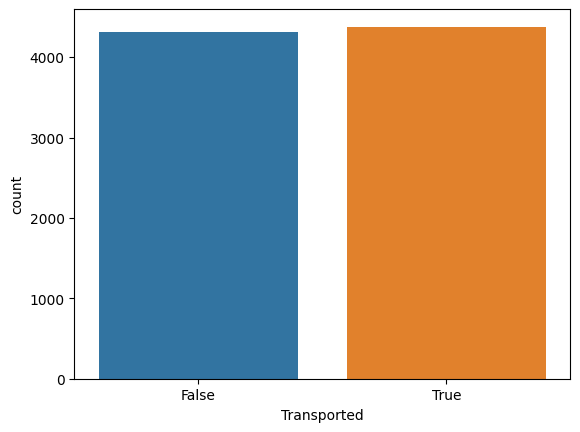

In [8]:
sns.countplot(data=df,x='Transported')


In [9]:
df['Transported'].value_counts()


Transported
True     4378
False    4315
Name: count, dtype: int64

In [10]:
df['HomePlanet'].value_counts()


HomePlanet
Earth     4602
Europa    2131
Mars      1759
Name: count, dtype: int64

<Axes: xlabel='HomePlanet', ylabel='count'>

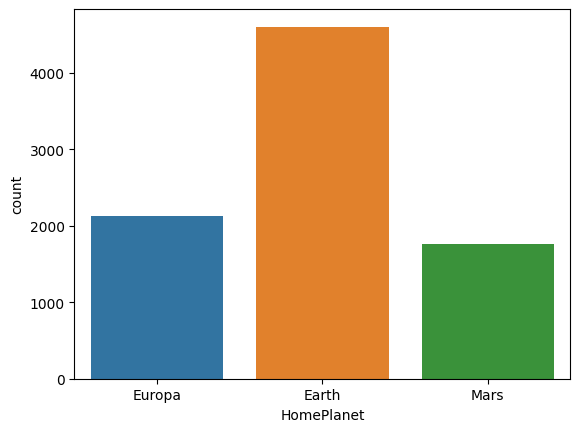

In [11]:
sns.countplot(data=df,x='HomePlanet')


Text(0.5, 0.98, 'Information Graph')

<Axes: xlabel='Transported', ylabel='count'>

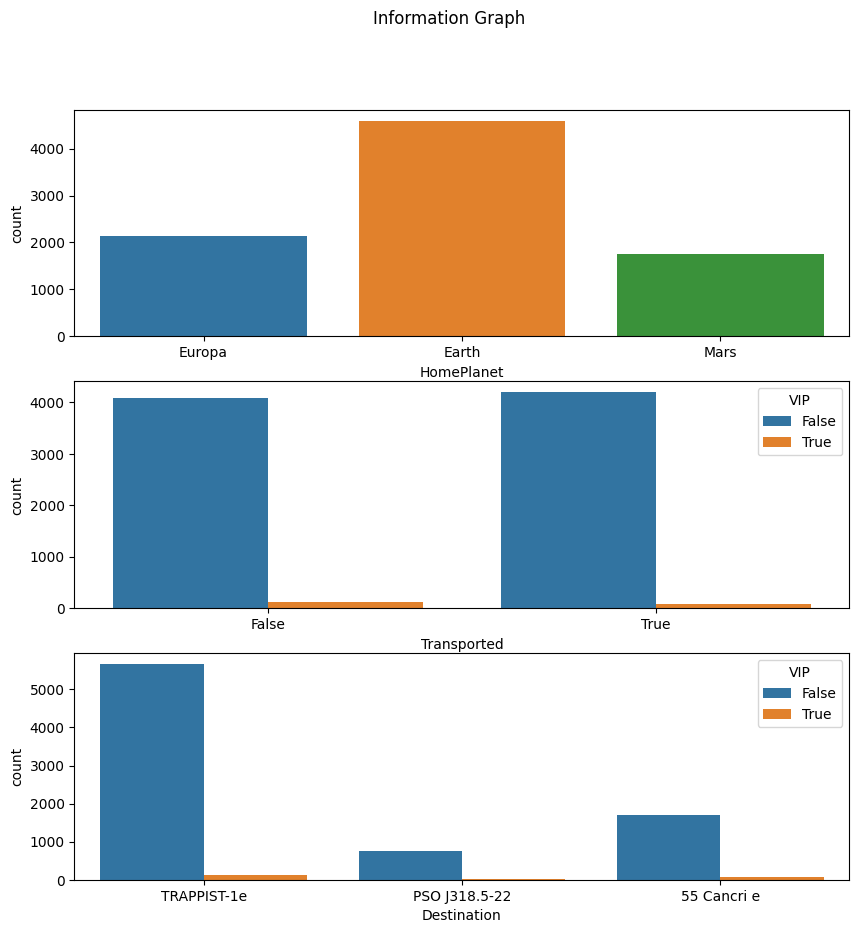

In [12]:
fig,ax=plt.subplots(3,1,figsize=(10,10))
fig.suptitle('Information Graph')
ax1=sns.countplot(data=df,x='HomePlanet',ax=ax[0])
#ax2=sns.histplot(data=df,x='Age',ax=ax[1])
ax3=sns.countplot(data=df,x='Destination',ax=ax[2],hue='VIP')
sns.countplot(data=df,x='Transported',ax=ax[1],hue='VIP')



In [13]:
df.isnull().sum().sort_values(ascending=False)


CryoSleep       217
ShoppingMall    208
VIP             203
HomePlanet      201
Name            200
Cabin           199
VRDeck          188
FoodCourt       183
Spa             183
Destination     182
RoomService     181
Age             179
PassengerId       0
Transported       0
dtype: int64

In [14]:
df['CryoSleep'].value_counts()


CryoSleep
False    5439
True     3037
Name: count, dtype: int64

<Axes: xlabel='CryoSleep', ylabel='count'>

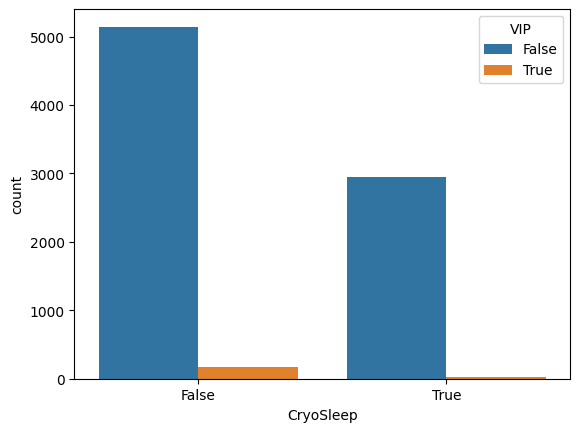

In [15]:
sns.countplot(data=df,x='CryoSleep',hue='VIP')


In [16]:
df['Total_Spend']=df[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].sum(axis=1)


<Axes: xlabel='Total_Spend', ylabel='Count'>

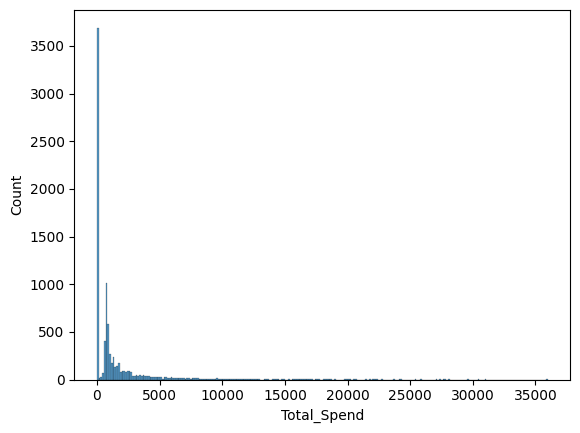

In [17]:
sns.histplot(df['Total_Spend'])


In [18]:
# df[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']]
# fig,ax=plt.subplots(5,1,figsize=(10,10))
#df['RoomService'].fillna(0)
# Better way to fill na is to use SimpleImputer

(array([7.758e+03, 5.720e+02, 2.040e+02, 7.100e+01, 4.100e+01, 2.300e+01,
        1.000e+01, 9.000e+00, 4.000e+00, 1.000e+00]),
 array([    0. ,  3598.7,  7197.4, 10796.1, 14394.8, 17993.5, 21592.2,
        25190.9, 28789.6, 32388.3, 35987. ]),
 <BarContainer object of 10 artists>)

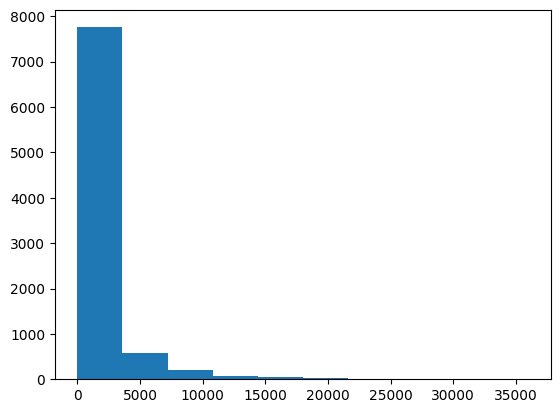

In [19]:
fix,ax=plt.subplots()
ax.hist(df['Total_Spend'])


<Axes: xlabel='Age', ylabel='RoomService'>

<Axes: xlabel='Age', ylabel='FoodCourt'>

<Axes: xlabel='Age', ylabel='ShoppingMall'>

<Axes: xlabel='Age', ylabel='Spa'>

<Axes: xlabel='Age', ylabel='VRDeck'>

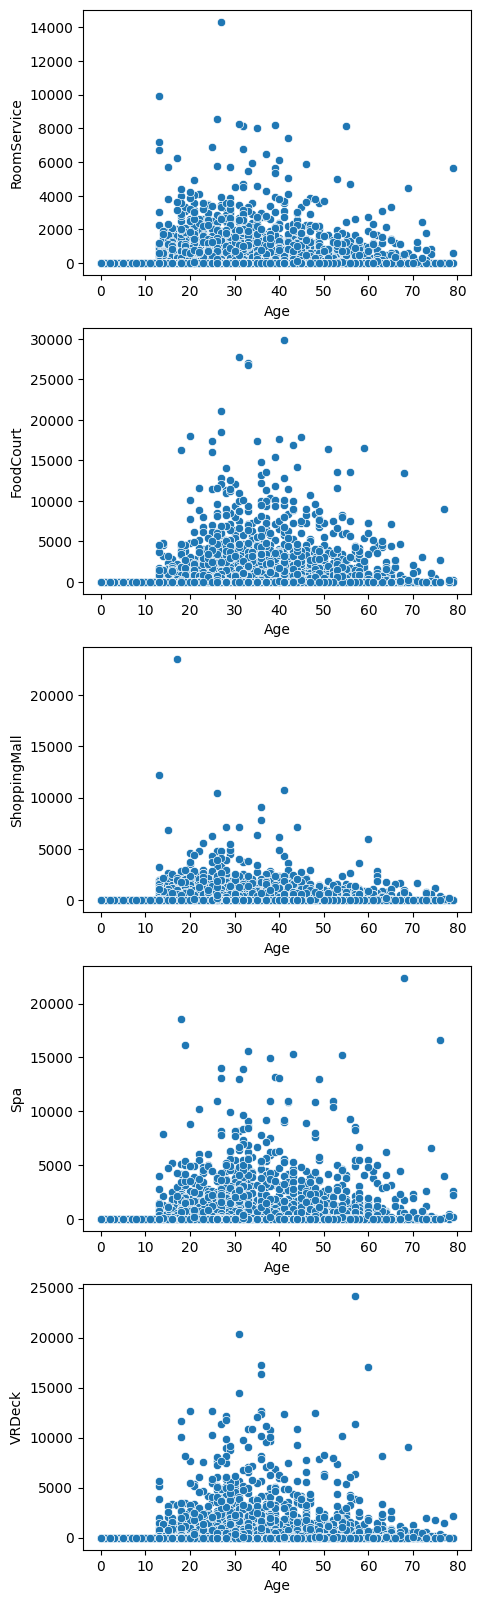

In [20]:
fix,ax=plt.subplots(5,1,figsize=(5,20))
i=0
billing=['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']
for i,k in enumerate(billing,start=0):
    sns.scatterplot(data=df,x='Age',y=k,ax=ax[i])
    i+=1


In [21]:
for i,k in enumerate(billing):
    print(f'the mean of category {k}: {df[k].mean()}')
    print(f'the max of category {k}: {df[k].max()}')


the mean of category RoomService: 224.687617481203
the max of category RoomService: 14327.0
the mean of category FoodCourt: 458.07720329024676
the max of category FoodCourt: 29813.0
the mean of category ShoppingMall: 173.72916912197996
the max of category ShoppingMall: 23492.0
the mean of category Spa: 311.1387779083431
the max of category Spa: 22408.0
the mean of category VRDeck: 304.8547912992357
the max of category VRDeck: 24133.0


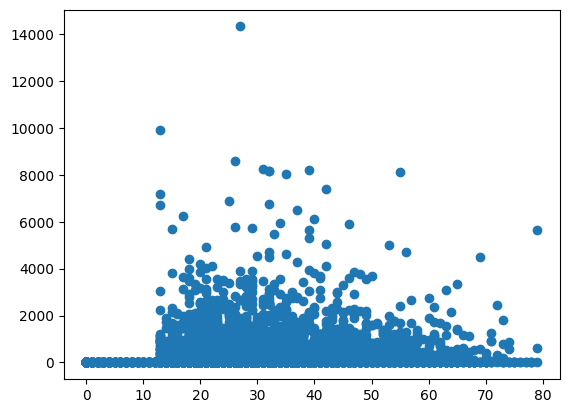

In [22]:
fig,ax=plt.subplots()
plt.scatter(df['Age'],df['RoomService'])


**Missing Values**

In [23]:

df.isnull().sum()


PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
Total_Spend       0
dtype: int64

In [24]:
num_col=df.select_dtypes(exclude='object').columns.to_list()
cat_col=df.select_dtypes(include='object').columns.to_list()

for col in cat_col:
    
    df[col]=df[col].fillna(df[col].value_counts().idxmax())
    
for col in num_col:
    df[col]=df[col].fillna(df[col].median())

In [25]:
df.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
Total_Spend     0
dtype: int64

In [26]:
# from sklearn.impute import SimpleImputer

# imp=SimpleImputer(strategy='mean')

In [27]:
# #Function for imputer
# #Key thing in this function is adding data[col]=imp.fit- without assignment the values in original file doesn't change

# imp_dict={}
# def imp_func(data,col,strategy):
#     imp=SimpleImputer(strategy=strategy)
#     data[col]=imp.fit_transform(data[[col]])
#     imp_dict[col]=imp
#     return data[col]
    

In [28]:
# #filling with median is better than mean
# df['RoomService']=imp_func(df,'RoomService','median')
# df['FoodCourt']=imp_func(df,'FoodCourt','median')
# df['ShoppingMall']=imp_func(df,'ShoppingMall','median')
# df['Spa']=imp_func(df,'Spa','median')
# df['VRDeck']=imp_func(df,'VRDeck','median')
# # df['HomePlanet']=imp_func(df,'HomePlanet','most_frequent')
# df['CryoSleep']=imp_func(df,'CryoSleep','most_frequent')
# df['Cabin']=imp_func(df,'Cabin','most_frequent')
# df['Destination']=imp_func(df,'Destination','most_frequent')
# df['VIP']=imp_func(df,'VIP','most_frequent')
# df['Age']=imp_func(df,'Age','median')





In [29]:
items=['FoodCourt','ShoppingMall','Spa','VRDeck']
for i,item in enumerate(items):
    print(f'The mean of {item}:{df[item].mean()}')
    print(f'The median of {item}:{df[item].median()}')


The mean of FoodCourt:448.4340273783504
The median of FoodCourt:0.0
The mean of ShoppingMall:169.57229955136316
The median of ShoppingMall:0.0
The mean of Spa:304.5888646037041
The median of Spa:0.0
The mean of VRDeck:298.2618198550558
The median of VRDeck:0.0


In [30]:
# df['VIP'].value_counts()


In [31]:
df['GroupID']=df['PassengerId'].apply(lambda x:x.split("_")[0])


In [32]:
df['GroupID'].nunique()


6217

In [33]:
df[df['HomePlanet'].isnull()]['GroupID']


Series([], Name: GroupID, dtype: object)

In [34]:
len(df)


8693

In [35]:
df.isnull().sum()



PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
Total_Spend     0
GroupID         0
dtype: int64

 Dropping null values


In [36]:
# df=df.dropna(subset=['HomePlanet','CryoSleep','Cabin','Destination','Age','VIP','Name'])


In [37]:
len(df)
#this might have dropped about 900 values, which is slightly high but I will come back to this


8693

 One-Hot Encoding

In [38]:
df.select_dtypes('object').columns



Index(['PassengerId', 'HomePlanet', 'Cabin', 'Destination', 'Name', 'GroupID'], dtype='object')

In [39]:
# df['C1']=df['Cabin'].apply(lambda x: x.split('/')[0])
# df['C1']=df['Cabin'].str.split('/')[0]


In [40]:
df['C1'] = df['Cabin'].apply(lambda x: x.split('/')[0] if isinstance(x, str) else None)
df['C2'] = df['Cabin'].apply(lambda x: x.split('/')[1] if isinstance(x, str) else None)
df['C3'] = df['Cabin'].apply(lambda x: x.split('/')[2] if isinstance(x, str) else None)

In [41]:
df['C1']=df['C1'].fillna(df['C1'].value_counts().idxmax())
df['C2']=df['C2'].fillna(df['C2'].value_counts().idxmax())
df['C3']=df['C3'].fillna(df['C3'].value_counts().idxmax())

In [42]:
# df['C2']=df['Cabin'].apply(lambda x: x.split('/')[1])
# df['C3']=df['Cabin'].apply(lambda x: x.split('/')[2])


In [43]:
df=df.rename({'C1':'Deck','C3':'Port'},axis='columns')


In [44]:
df['GroupID'].value_counts()


GroupID
4498    8
8168    8
8728    8
8796    8
8956    8
       ..
3483    1
3480    1
3478    1
3473    1
4620    1
Name: count, Length: 6217, dtype: int64

In [45]:
df.drop(['PassengerId','Cabin','C2','Name','GroupID'],axis=1,inplace=True)


In [46]:
df.head()


,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Total_Spend,Deck,Port
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0.0,B,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,736.0,F,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,10383.0,A,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,5176.0,A,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,1091.0,F,S


In [47]:

df['CryoSleep'].nunique()

2

In [48]:
#CryoSleep and VIP are already encoded. Need to convert True/False to 1/0
# df[['VIP','CryoSleep']]=df[['VIP','CryoSleep']].map({"True":1,"False":0})
#%%stop
df['CryoSleep']=df['CryoSleep'].apply(lambda x: 1 if x else 0)
df['VIP']=df['VIP'].apply(lambda x: 1 if x else 0)


In [49]:
#Only these needed to be converted to one hot
cat_columns=['HomePlanet','Destination','Deck','Port']


In [50]:
dummies=pd.get_dummies(df[cat_columns],drop_first=True)


In [51]:
dummies


,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Port_S
0,True,False,False,True,True,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,True,False,False,True
2,True,False,False,True,False,False,False,False,False,False,False,True
3,True,False,False,True,False,False,False,False,False,False,False,True
4,False,False,False,True,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,True,False,False,False,False,False,False,False,False,False,False,False
8689,False,False,True,False,False,False,False,False,False,True,False,True
8690,False,False,False,True,False,False,False,False,False,True,False,True
8691,True,False,False,False,False,False,False,True,False,False,False,True


In [52]:
df_onehot=pd.concat([df.drop(df[cat_columns],axis=1),dummies],axis=1)


In [53]:
df_onehot.isnull().sum()

CryoSleep                    0
Age                          0
VIP                          0
RoomService                  0
FoodCourt                    0
ShoppingMall                 0
Spa                          0
VRDeck                       0
Transported                  0
Total_Spend                  0
HomePlanet_Europa            0
HomePlanet_Mars              0
Destination_PSO J318.5-22    0
Destination_TRAPPIST-1e      0
Deck_B                       0
Deck_C                       0
Deck_D                       0
Deck_E                       0
Deck_F                       0
Deck_G                       0
Deck_T                       0
Port_S                       0
dtype: int64

In [54]:
df_onehot.isnull().sum()

CryoSleep                    0
Age                          0
VIP                          0
RoomService                  0
FoodCourt                    0
ShoppingMall                 0
Spa                          0
VRDeck                       0
Transported                  0
Total_Spend                  0
HomePlanet_Europa            0
HomePlanet_Mars              0
Destination_PSO J318.5-22    0
Destination_TRAPPIST-1e      0
Deck_B                       0
Deck_C                       0
Deck_D                       0
Deck_E                       0
Deck_F                       0
Deck_G                       0
Deck_T                       0
Port_S                       0
dtype: int64

 Model Prep

In [55]:
from sklearn.model_selection import train_test_split


In [56]:
X=df_onehot.drop('Transported',axis=1)
y=df_onehot['Transported']


In [57]:
X_rem, X_test, y_rem, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)



In [58]:
print(X_train.shape,X_val.shape,X_test.shape)


(6954, 21) (1739, 21) (1739, 21)


In [59]:
from sklearn.linear_model import LogisticRegression,RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler


In [60]:
scaler=MinMaxScaler()


In [61]:
X_train=scaler.fit_transform(X_train)
X_val=scaler.transform(X_val)
X_test=scaler.transform(X_test)


In [62]:
lr=LogisticRegression(max_iter=1000)


In [63]:
lr.fit(X_train,y_train)


LogisticRegression(max_iter=1000)

In [64]:
lr.get_params()


{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 1000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [65]:
predictions=lr.predict(X_val)


In [66]:
from sklearn.metrics import f1_score,confusion_matrix,r2_score


In [67]:
print(f1_score(y_val,predictions))
print(confusion_matrix(y_val,predictions))



0.7504488330341113
[[695 166]
 [251 627]]


In [68]:
ridge=RidgeClassifier()


In [69]:
ridge.fit(X_train,y_train)


RidgeClassifier()

In [70]:
ridge_pred=ridge.predict(X_val)


In [71]:
print(f1_score(y_val,ridge_pred))


0.747584541062802


In [72]:
rfc=RandomForestClassifier()


In [73]:
rfc.fit(X_train,y_train)


RandomForestClassifier()

In [74]:
rfc.get_params()


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [75]:
rfc_pred=rfc.predict(X_val)


In [76]:
print(f1_score(y_val,rfc_pred))


0.7821552723059096


In [77]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV


In [78]:
#param_grid={'n_estimators':[5,10,50,100],'max_depth':[3,5,10],'max_features':[1,3,5,7],'criterion':['gini', 'entropy', 'log_loss']}
#First iteration mentioned entropy is best criterion. So running this with other items
param_grid={'n_estimators':[10,50,100,200],'max_depth':[3,10,15],'max_features':[1,5,15],'criterion':['entropy']}


In [79]:
# rf_g=GridSearchCV(rfc,param_grid=param_grid,cv=5,scoring='accuracy',return_train_score=True)


In [80]:
# rf_g.fit(X_train,y_train)


In [81]:
# rf_g.best_estimator_


In [82]:
# rf_g.best_score_


In [83]:
rfr=RandomForestClassifier(criterion='entropy',max_depth=10,max_features=200)


In [84]:
rfr.fit(X_train,y_train)


RandomForestClassifier(criterion='entropy', max_depth=10, max_features=200)

In [85]:
rfr_predict_v2=rfr.predict(X_val)


In [86]:
print(f1_score(y_val,rfr_predict_v2))


0.7925801011804384


In [87]:
final_test=rfr.predict(X_test)


In [88]:
print(f1_score(y_test,final_test))


0.7925801011804384


In [89]:
df_test= pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')

In [90]:
df_test.drop(['Name'],axis=1,inplace=True)

In [91]:
df_test.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
dtype: int64

In [92]:
num_col=df_test.select_dtypes(exclude='object').columns.to_list()
cat_col=df_test.select_dtypes(include='object').columns.to_list()

for col in cat_col:
    df_test[col]=df_test[col].fillna(df_test[col].value_counts().idxmax())
    
for col in num_col:
    df_test[col]=df_test[col].fillna(df_test[col].median())

In [93]:
submission_id = df_test.PassengerId

In [94]:
df_test['Total_Spend']=df_test[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].sum(axis=1)

In [95]:
df_test['C1']=df_test['Cabin'].astype('str').apply(lambda x: x.split('/')[0])
# df['C2']=df['Cabin'].apply(lambda x: x.split('/')[1])
df_test['C3']=df_test['Cabin'].astype('str').apply(lambda x: x.split('/')[2])

df_test=df_test.rename({'C1':'Deck','C3':'Port'},axis='columns')

In [96]:
df_test['CryoSleep']=df_test['CryoSleep'].apply(lambda x: 1 if x else 0)

In [97]:
df_test['CryoSleep']=df_test['CryoSleep'].apply(lambda x: 1 if x else 0)
df_test['VIP']=df_test['VIP'].apply(lambda x: 1 if x else 0)

In [98]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4277 non-null   object 
 2   CryoSleep     4277 non-null   int64  
 3   Cabin         4277 non-null   object 
 4   Destination   4277 non-null   object 
 5   Age           4277 non-null   float64
 6   VIP           4277 non-null   int64  
 7   RoomService   4277 non-null   float64
 8   FoodCourt     4277 non-null   float64
 9   ShoppingMall  4277 non-null   float64
 10  Spa           4277 non-null   float64
 11  VRDeck        4277 non-null   float64
 12  Total_Spend   4277 non-null   float64
 13  Deck          4277 non-null   object 
 14  Port          4277 non-null   object 
dtypes: float64(7), int64(2), object(6)
memory usage: 501.3+ KB


In [99]:
df_test=df_test.drop(['Cabin','PassengerId'],axis=1)

In [100]:
cat_columns

['HomePlanet', 'Destination', 'Deck', 'Port']

In [101]:
dummies_test=pd.get_dummies(df_test[cat_columns],drop_first=True)

In [102]:
dummies_test.reset_index(drop=True, inplace=True)
dummies_test


,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Port_S
0,False,False,False,True,False,False,False,False,False,True,False,True
1,False,False,False,True,False,False,False,False,True,False,False,True
2,True,False,False,False,False,True,False,False,False,False,False,True
3,True,False,False,True,False,True,False,False,False,False,False,True
4,False,False,False,True,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
4272,False,False,False,True,False,False,False,False,False,True,False,True
4273,False,False,False,True,False,False,False,False,False,True,False,False
4274,False,True,False,False,False,False,True,False,False,False,False,False
4275,True,False,False,True,False,False,True,False,False,False,False,False


In [103]:
dftest_onehot=pd.concat([df_test.drop(df[cat_columns],axis=1),dummies_test],axis=1)

In [104]:
df_onehot.columns

Index(['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall',
       'Spa', 'VRDeck', 'Transported', 'Total_Spend', 'HomePlanet_Europa',
       'HomePlanet_Mars', 'Destination_PSO J318.5-22',
       'Destination_TRAPPIST-1e', 'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E',
       'Deck_F', 'Deck_G', 'Deck_T', 'Port_S'],
      dtype='object')

In [105]:
dftest_onehot.head().columns

Index(['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall',
       'Spa', 'VRDeck', 'Total_Spend', 'HomePlanet_Europa', 'HomePlanet_Mars',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'Deck_B',
       'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_T', 'Port_S'],
      dtype='object')

In [106]:
X_finaltest=dftest_onehot

In [107]:
X_finaltest=scaler.transform(X_finaltest)
# X_finaltest.info()

In [108]:
testdata_pred=rfr.predict(X_finaltest)

In [109]:
submission = pd.DataFrame({"PassengerId": submission_id, "Transported": testdata_pred})
submission.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [110]:
submission.to_csv('submission.csv', index = False)
print("My competition submission: \n\n", submission)

My competition submission: 

      PassengerId  Transported
0        0013_01         True
1        0018_01        False
2        0019_01         True
3        0021_01         True
4        0023_01         True
...          ...          ...
4272     9266_02         True
4273     9269_01        False
4274     9271_01         True
4275     9273_01         True
4276     9277_01         True

[4277 rows x 2 columns]
